In [1]:
import tensorflow as tf
import keras as k
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import glob
import pandas as pd
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
! python --version

Python 2.7.5


In [3]:
tf.__version__

'1.13.1'

In [4]:
k.__version__

'2.2.4'

In [5]:
read_all_imgs = []
for img_path in glob.glob("/data/hollatz/deep_learning/datasets/try2_gray_512_pgm/pgm/*.pgm"):
    img_frame = Image.open(img_path)
    split_path = img_path.split("/")
    split_format = split_path[-1].split(".")
    split_num = split_format[0].split("_")
    img_array = np.asarray(img_frame)
    img_array = img_array.reshape((img_array.shape[0], img_array.shape[1], 1))
    read_all_imgs.append((img_array, split_num[-1]))

In [6]:
read_all_imgs[0][1]

'30993'

In [7]:
from operator import itemgetter
sorted_all_imgs = sorted(read_all_imgs, key=itemgetter(1))

In [11]:
all_imgs = [ i for i,j in sorted_all_imgs]

In [12]:
all_imgs = np.array(all_imgs)

In [13]:
all_imgs.shape

(38742, 512, 512, 1)

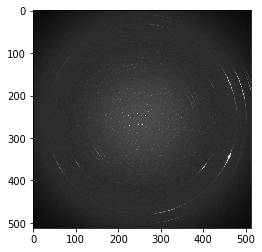

In [14]:
plt.imshow(all_imgs[0].reshape(all_imgs[0].shape[0], all_imgs[0].shape[1]), cmap='gray')

In [15]:
df_labels = pd.read_csv('/data/hollatz/deep_learning/datasets/try2_gray_512_pgm/multiclasses.txt', sep=' ', 
                        names=['blank', 'photo1', 'photo2', 'multilattice', 'ice', 'badice', 'mosaic1', 'mosaic2'])

In [16]:
df_labels.head()

,blank,photo1,photo2,multilattice,ice,badice,mosaic1,mosaic2
fake_00001.pgm,0,1,0,0,1,0,0.892528,0.000000
fake_00002.pgm,0,0,1,1,0,0,0.581729,0.568217
fake_00003.pgm,0,1,0,0,0,0,0.508285,0.000000
fake_00004.pgm,0,1,0,0,0,0,0.852589,0.000000
fake_00005.pgm,0,0,1,0,0,0,0.762097,0.000000


In [17]:
print "Number of images per category:"
print "blank: ", df_labels.blank[df_labels.blank == 1].count()
print "photo1: ", df_labels.photo1[df_labels.photo1 == 1].count()
print "photo2: ", df_labels.photo2[df_labels.photo2 == 1].count()
print "multilattice: ", df_labels.multilattice[df_labels.multilattice == 1].count()
print "ice: ", df_labels.ice[df_labels.ice == 1].count()
print "badice: ", df_labels.badice[df_labels.badice == 1].count()
print "mosaic1: ", df_labels.mosaic1[df_labels.mosaic1 > 0].count()
print "mosaic2: ", df_labels.mosaic1[df_labels.mosaic2 > 0].count()

Number of images per category:
blank:  114
photo1:  22722
photo2:  22796
multilattice:  13345
ice:  9099
badice:  4151
mosaic1:  38628
mosaic2:  13483


In [18]:
X_train, X_test, y_train, y_test = train_test_split(all_imgs, df_labels, test_size=0.33, random_state=42)

In [19]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

In [20]:
print("Training Images: ")
print(X_train.shape)
print(y_train.shape)
print("\n Validation Images: ")
print(X_val.shape)
print(y_val.shape)
print("\n Test Images: ")
print(X_test.shape)
print(y_test.shape)

Training Images: 
(25957, 512, 512, 1)
(25957, 8)

 Validation Images: 
(8565, 512, 512, 1)
(8565, 8)

 Test Images: 
(4220, 512, 512, 1)
(4220, 8)


In [21]:
y_train.head()

,blank,photo1,photo2,multilattice,ice,badice,mosaic1,mosaic2
fake_31986.pgm,0,1,0,1,1,1,0.710776,0.886752
fake_01706.pgm,0,1,0,0,0,0,0.770968,0.000000
fake_09435.pgm,0,0,1,0,0,0,0.512017,0.000000
fake_11359.pgm,0,1,0,0,0,0,0.810447,0.000000
fake_38172.pgm,0,1,1,1,0,0,0.588032,0.764495


In [22]:
print "Number of training images per category:"
print "blank: ", y_train.blank[y_train.blank == 1].count()
print "photo1: ", y_train.photo1[y_train.photo1 == 1].count()
print "photo2: ", y_train.photo2[y_train.photo2 == 1].count()
print "multilattice: ", y_train.multilattice[y_train.multilattice == 1].count()
print "ice: ", y_train.ice[y_train.ice == 1].count()
print "badice: ", y_train.badice[y_train.badice == 1].count()
print "mosaic1: ", y_train.mosaic1[y_train.mosaic1 > 0].count()
print "mosaic2: ", y_train.mosaic1[y_train.mosaic2 > 0].count()

Number of training images per category:
blank:  71
photo1:  15239
photo2:  15298
multilattice:  8974
ice:  6128
badice:  2753
mosaic1:  25886
mosaic2:  9066


In [23]:
print "Number of validation images per category:"
print "blank: ", y_val.blank[y_val.blank == 1].count()
print "photo1: ", y_val.photo1[y_val.photo1 == 1].count()
print "photo2: ", y_val.photo2[y_val.photo2 == 1].count()
print "multilattice: ", y_val.multilattice[y_val.multilattice == 1].count()
print "ice: ", y_val.ice[y_val.ice == 1].count()
print "badice: ", y_val.badice[y_val.badice == 1].count()
print "mosaic1: ", y_val.mosaic1[y_val.mosaic1 > 0].count()
print "mosaic2: ", y_val.mosaic1[y_val.mosaic2 > 0].count()

Number of validation images per category:
blank:  28
photo1:  5038
photo2:  5011
multilattice:  2967
ice:  1985
badice:  942
mosaic1:  8537
mosaic2:  2996


In [24]:
print "Number of test images per category:"
print "blank: ", y_test.blank[y_test.blank == 1].count()
print "photo1: ", y_test.photo1[y_test.photo1 == 1].count()
print "photo2: ", y_test.photo2[y_test.photo2 == 1].count()
print "multilattice: ", y_test.multilattice[y_test.multilattice == 1].count()
print "ice: ", y_test.ice[y_test.ice == 1].count()
print "badice: ", y_test.badice[y_test.badice == 1].count()
print "mosaic1: ", y_test.mosaic1[y_test.mosaic1 > 0].count()
print "mosaic2: ", y_test.mosaic1[y_test.mosaic2 > 0].count()

Number of test images per category:
blank:  15
photo1:  2445
photo2:  2487
multilattice:  1404
ice:  986
badice:  456
mosaic1:  4205
mosaic2:  1421


In [25]:
y_train_array = np.array([[[feature[0]],[feature[1]],[feature[2]],[feature[3]],[feature[4]],[feature[5]],[feature[6]],[feature[7]]]  for feature in y_train.values.tolist()])
y_val_array = np.array([[[feature[0]],[feature[1]],[feature[2]],[feature[3]],[feature[4]],[feature[5]],[feature[6]], [feature[7]]]  for feature in y_val.values.tolist()])

# print(y_train_array[0])
y_train_blank = np.array([label[0] for label in y_train_array])
y_train_photo1 = np.array([label[1] for label in y_train_array])
y_train_photo2 = np.array([label[2] for label in y_train_array])
y_train_multilattice = np.array([label[3] for label in y_train_array])
y_train_ice = np.array([label[4] for label in y_train_array])
y_train_badice = np.array([label[5] for label in y_train_array])
y_train_mosaic1 = np.array([label[6] for label in y_train_array])
y_train_mosaic2 = np.array([label[7] for label in y_train_array])

y_val_blank = np.array([label[0] for label in y_val_array])
y_val_photo1 = np.array([label[1] for label in y_val_array])
y_val_photo2 = np.array([label[2] for label in y_val_array])
y_val_multilattice = np.array([label[3] for label in y_val_array])
y_val_ice = np.array([label[4] for label in y_val_array])
y_val_badice = np.array([label[5] for label in y_val_array])
y_val_mosaic1 = np.array([label[6] for label in y_val_array])
y_val_mosaic2 = np.array([label[7] for label in y_val_array])
print(y_train_array.shape)
print(y_train.shape)

(25957, 8, 1)
(25957, 8)


In [26]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=360,
    rescale=1./255)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)

In [27]:
input_X = k.layers.Input(shape=(512, 512, 1), name="input")

conv1_1 = k.layers.Conv2D(filters=32, kernel_size=[3, 3], padding="same", activation=k.layers.advanced_activations.LeakyReLU(alpha=0.1),
                          data_format="channels_last", name="conv1_1")(input_X)
pool1 = k.layers.MaxPooling2D(pool_size=[2, 2], strides=2, name="pool1")(conv1_1)
dropout1 = k.layers.Dropout(0.25)(pool1)

conv2_1 = k.layers.Conv2D(filters=64, kernel_size=[3, 3],
                          padding="same", activation=k.layers.advanced_activations.LeakyReLU(alpha=0.1), name="conv2_1")(dropout1)
pool2 = k.layers.MaxPooling2D(pool_size=[2, 2], strides=2, name="pool2")(conv2_1)
dropout2 = k.layers.Dropout(0.25)(pool2)

conv3_1 = k.layers.Conv2D(filters=128, kernel_size=[3, 3],
                          padding="same", activation=k.layers.advanced_activations.LeakyReLU(alpha=0.1), name="conv3_1")(dropout2)
pool3 = k.layers.MaxPooling2D(pool_size=[2, 2], strides=2, name="pool3")(conv3_1)
dropout3 = k.layers.Dropout(0.4)(pool3)

conv4_1 = k.layers.Conv2D(filters=128, kernel_size=[3, 3],
                          padding="same", activation=k.layers.advanced_activations.LeakyReLU(alpha=0.1), name="conv4_1")(dropout3)
pool4 = k.layers.MaxPooling2D(pool_size=[2, 2], strides=2, name="pool4")(conv4_1)
dropout4 = k.layers.Dropout(0.3)(pool4)

flatten = k.layers.Flatten()(dropout4)
fc6 = k.layers.Dense(units=4096, activation=tf.nn.relu, name="fc6")(flatten)
fc7 = k.layers.Dense(units=512, activation=tf.nn.relu, name="fc7")(fc6)
# logits = k.layers.Dense(units=8, activation=None, name="logits")(fc7)
logits_blank = k.layers.Dense(units=1, activation=None, name="blank_logits")(fc7)
logits_photo1 = k.layers.Dense(units=1, activation=None, name="photo1_logits")(fc7)
logits_photo2 = k.layers.Dense(units=1, activation=None, name="photo2_logits")(fc7)
logits_multilattice = k.layers.Dense(units=1, activation=None, name="multilattice_logits")(fc7)
logits_ice = k.layers.Dense(units=1, activation=None, name="ice_logits")(fc7)
logits_badice = k.layers.Dense(units=1, activation=None, name="badice_logits")(fc7)
logits_mosaic1 = k.layers.Dense(units=1, activation=None, name="mosaic1_logits")(fc7)
logits_mosaic2 = k.layers.Dense(units=1, activation=None, name="mosaic2_logits")(fc7)

model_shallow = k.Model(inputs=input_X, outputs=[logits_blank, logits_photo1, logits_photo2, logits_multilattice,\
                                              logits_ice, logits_badice, logits_mosaic1, logits_mosaic2])
# modelVGG16 = k.Model(inputs=input_X, outputs=logits)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/lib64/python2.7/site-packages/keras/activations.py:211: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [28]:
model_shallow.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 512, 512, 1)  0                                            
__________________________________________________________________________________________________
conv1_1 (Conv2D)                (None, 512, 512, 32) 320         input[0][0]                      
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 256, 256, 32) 0           conv1_1[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 256, 256, 32) 0           pool1[0][0]                      
__________________________________________________________________________________________________
conv2_1 (C

In [29]:
model_shallow.compile(loss=['binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy', \
                         'binary_crossentropy', 'binary_crossentropy', 'mse', 'mse'],
                   optimizer=k.optimizers.Adam(0.0001))

In [34]:
epochs = 10
batchsize = 32

def multiple_outputs(generator, X, y, batch_size):
    gen = generator.flow(X, y, batch_size=batchsize)
    while True:
        gnext = gen.next()
        ys_blank = [label[0] for label in gnext[1]]
        ys_photo1 = np.array([label[1] for label in gnext[1]])
        ys_photo2 = np.array([label[2] for label in gnext[1]])
        ys_multilattice = np.array([label[3] for label in gnext[1]])
        ys_ice = np.array([label[4] for label in gnext[1]])
        ys_badice = np.array([label[5] for label in gnext[1]])
        ys_mosaic1 = np.array([label[6] for label in gnext[1]])
        ys_mosaic2 = np.array([label[7] for label in gnext[1]])
        yield gnext[0], [ys_blank, ys_photo1, ys_photo2, ys_multilattice, ys_ice, ys_badice, ys_mosaic1, ys_mosaic2]

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

train_gen = multiple_outputs(train_datagen, X_train, y_train, batchsize)
val_gen = multiple_outputs(val_datagen, X_val, y_val, batchsize)

In [35]:
# data is randomly shuffled at each epoch
# history object is a record of training and validation loss values and metrics values at successive epochs
history = model_shallow.fit_generator(train_gen, 
                    validation_data=val_gen,
                    steps_per_epoch=len(X_train) / batchsize,
                    validation_steps=len(X_val) / batchsize,
                    shuffle=True,
                    callbacks=[callback],
                    epochs=epochs)

Epoch 1/10
811/811 [==============================] - 450s 555ms/step - loss: 23.1914 - blank_logits_loss: 0.0429 - photo1_logits_loss: 1.1028 - photo2_logits_loss: 9.4993 - multilattice_logits_loss: 5.7111 - ice_logits_loss: 3.8035 - badice_logits_loss: 2.5071 - mosaic1_logits_loss: 0.3499 - mosaic2_logits_loss: 0.1748 - val_loss: 21.9630 - val_blank_logits_loss: 0.5504 - val_photo1_logits_loss: 0.7174 - val_photo2_logits_loss: 9.4286 - val_multilattice_logits_loss: 5.5859 - val_ice_logits_loss: 3.7315 - val_badice_logits_loss: 1.7695 - val_mosaic1_logits_loss: 0.0534 - val_mosaic2_logits_loss: 0.1263
Epoch 2/10
811/811 [==============================] - 362s 446ms/step - loss: 21.4638 - blank_logits_loss: 0.0441 - photo1_logits_loss: 0.6865 - photo2_logits_loss: 9.4994 - multilattice_logits_loss: 5.5688 - ice_logits_loss: 3.8049 - badice_logits_loss: 1.7113 - mosaic1_logits_loss: 0.0234 - mosaic2_logits_loss: 0.1253 - val_loss: 21.6930 - val_blank_logits_loss: 0.3288 - val_photo1_log

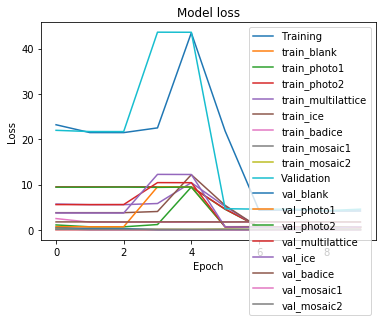

In [37]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['blank_logits_loss'])
plt.plot(history.history['photo1_logits_loss'])
plt.plot(history.history['photo2_logits_loss'])
plt.plot(history.history['multilattice_logits_loss'])
plt.plot(history.history['ice_logits_loss'])
plt.plot(history.history['badice_logits_loss'])
plt.plot(history.history['mosaic1_logits_loss'])
plt.plot(history.history['mosaic2_logits_loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_blank_logits_loss'])
plt.plot(history.history['val_photo1_logits_loss'])
plt.plot(history.history['val_photo2_logits_loss'])
plt.plot(history.history['val_multilattice_logits_loss'])
plt.plot(history.history['val_ice_logits_loss'])
plt.plot(history.history['val_badice_logits_loss'])
plt.plot(history.history['val_mosaic1_logits_loss'])
plt.plot(history.history['val_mosaic2_logits_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training','train_blank','train_photo1', 'train_photo2', 'train_multilattice', 'train_ice', 'train_badice', \
            'train_mosaic1', 'train_mosaic2', 'Validation', 'val_blank','val_photo1', 'val_photo2', 'val_multilattice', \
            'val_ice', 'val_badice', 'val_mosaic1', 'val_mosaic2'], loc='upper right')
plt.show()